> **REMINDER: DO NOT EDIT IF INSIDE CLONED GIT FOLDER**<br>
> \> Go ahead and copy it and paste it in another folder. Work inside the pasted file.

# Week 2: A Data Scientist's most fundamental tools

Today's exercises will be related to chapters 3, 4, 5 from DSfS. The point of these exercises is to refresh your memory on some mathematics and get you comfortable doing computations in code.

The exercises today cover:
* Basic visualization
* Linear algebra
* Statistics

**Advice**: Some of you may be new to solving problems using code. You may be wondering *what level of detail* I expect in your solutions, your code comments and explanations. **This is the guideline:** Solve the exercises in a manner that allows you to—later in life—use them as examples. This also means that you should add code comments when the code isn't self-explanatory or if you're afraid it won't make sense when you look at it with fresh eyes. You may also want to comment on your output in plain text to capture the conclusions you arrive at throughout your analysis. But express yourself succinctly. To quote (probably) Einstein: *"Make everything as simple as possible, but not simpler"*. Finally, when you optimize for your own future comprehension, other people will be able to understand what you did.

[**Feedback**](http://ulfaslak.com/vent)

## Exercises

### Part 1: Visualization (DSFS Chapter 3)

>**Ex. 2.1.1**: The figure below meets the minumum style requirements which I expect the figures you make in this class (and life in general) should also meet:
* Figure sizing. Try to make the aspect ratio close to 4:3.
* Axis labels. Note that you may want to alter the `fontsize` to make them look nice.
* Properly sized x and y tick labels.
* Title (optional: not always necessary, but oftens helps the reader)
* Legend (general rule: only use if you have multiple trends so reader can distinguish).
>
> Your task in this exercise if to reproduce this figure (perfect match not required).
>
>*Hint: To get figures to display inside the notebook, use the Jupyter magic `%matplotlib inline`. For pointers on how to make plots like this in Python, Google something like "scatter plot python" and see if you can find some examples of how other people do this.*

![img](https://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.1.1.png)

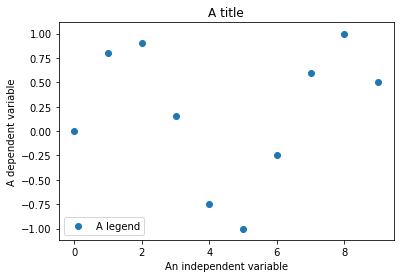

In [1]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
indep_var = range(10)
dep_var = [0, 0.8, 0.9, 0.15, -0.75, -1, -0.25, 0.6, 1, 0.5]

plt.scatter(indep_var, dep_var)
plt.title("A title")
plt.xlabel("An independent variable")
plt.ylabel("A dependent variable")
plt.legend (["A legend"], loc=3)
plt.show()

>**Ex. 2.1.2**: The `get_x_y` function below gives you the number of comments versus score for the latest `N` posts on a given `subreddit`.
1. Make a scatter plot of `x` vs. `y` for the "blackmirror" subreddit (remember what you learned in the previous exercise about styling). Comment on what you see.
2. Maybe you've noticed that it looks pretty bad right? That's because the data does *not scale linearly*! This is a very common thing. To visualize it you should then try to *transform* it somehow. In this case, the data scales *exponentially* in both the x and y direction. Which transformation should we use to make it linear?
3. In two seperate figures, floating side by side, scatter plot (left) the set of x and y variables for "blackmirror" and (right) x and y for "news". Remember to transform the data. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).
4. Comment on any differences you see in the trends. Why might number of comments versus post upvotes look different for a TV-show than for world news?
>
>*Hint: By "transformation" I explicitly mean that you map some function onto every value in a list of values. Example: I can apply a square root transformation like `x = [np.sqrt(v) for v in x]`. A faster way to do that, of course, would be just `x = np.sqrt(x)`.*

In [3]:
import requests as rq
from matplotlib import pyplot as plt

%matplotlib inline

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    x, y = [], []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          


In [4]:
x_tv, y_tv = get_x_y("blackmirror", 500, count=25)
x_ne, y_ne = get_x_y("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_cwlxpc
Retrieved 25 posts from page t3_cvtshq
Retrieved 25 posts from page t3_cu757w
Retrieved 25 posts from page t3_cttvs4
Retrieved 25 posts from page t3_cs5qir
Retrieved 25 posts from page t3_cragyx
Retrieved 25 posts from page t3_cqjl0m
Retrieved 25 posts from page t3_coorc3
Retrieved 25 posts from page t3_co3g7e
Retrieved 25 posts from page t3_cmxizc
Retrieved 25 posts from page t3_cmg2z2
Retrieved 25 posts from page t3_cldclh
Retrieved 25 posts from page t3_ckarb4
Retrieved 25 posts from page t3_ciyskf
Retrieved 25 posts from page t3_ci0b38
Retrieved 25 posts from page t3_chbj5w
Retrieved 25 posts from page t3_cfzy1n
Retrieved 25 posts from page t3_cfsy1y
Retrieved 25 posts from page t3_cf1khe
Retrieved 25 posts from page 
Retrieved 25 posts from page t3_cwml8u
Retrieved 25 posts from page t3_cwxte9
Retrieved 25 posts from page t3_cwkbd8
Retrieved 25 posts from page t3_cw826s
Retrieved 25 posts from page t3_cweqjr
Retr

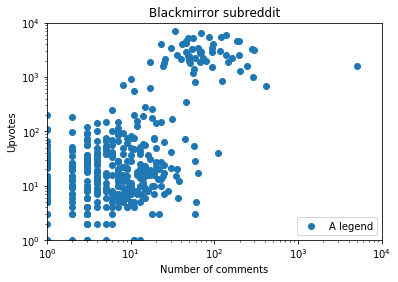

In [5]:
plt.xscale('log')
plt.yscale('log')
plt.xlim([1, 10000])
plt.ylim([1, 10000])
plt.scatter(x_tv, y_tv)
plt.title("Blackmirror subreddit")
plt.xlabel("Number of comments")
plt.ylabel("Upvotes")
plt.legend (["A legend"], loc=4)
plt.show()

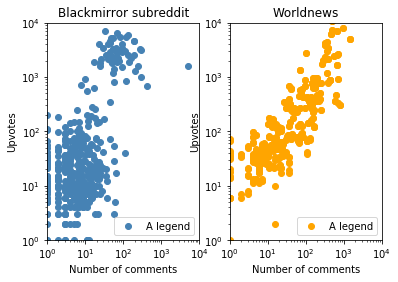

In [12]:
plt.subplot(1,2,1)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1, 10000])
plt.ylim([1, 10000])
plt.scatter(x_tv, y_tv, c="steelblue")
plt.title("Blackmirror subreddit")
plt.xlabel("Number of comments")
plt.ylabel("Upvotes")
plt.legend (["A legend"], loc=4)

plt.subplot(1,2,2)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1, 10000])
plt.ylim([1, 10000])
plt.scatter(x_ne, y_ne, c="orange")
plt.title("Worldnews")
plt.xlabel("Number of comments")
plt.ylabel("Upvotes")
plt.legend (["A legend"], loc=4)

plt.show()

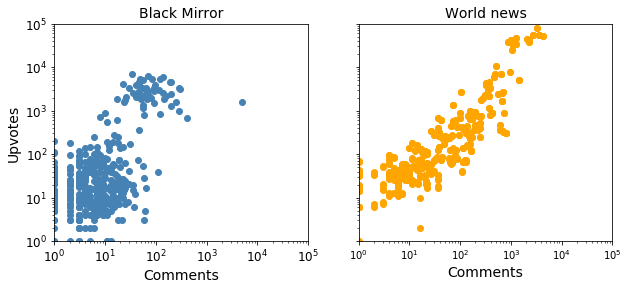

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)

ax[0].set_title("Black Mirror", fontsize=14)
ax[1].set_title("World news", fontsize=14)
ax[0].scatter(x_tv, y_tv, c="steelblue")
ax[1].scatter(x_ne, y_ne, c="orange")

ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlim(1, 1e5)
ax[0].set_ylim(1, 1e5)
ax[0].set_xlabel("Comments", fontsize=14)
ax[1].set_xlabel("Comments", fontsize=14)
ax[0].set_ylabel("Upvotes", fontsize=14)
ax[0].tick_params(labelsize=12)

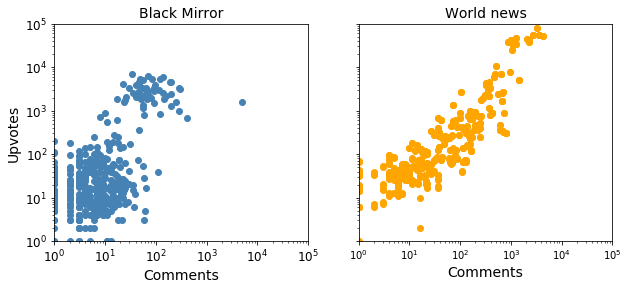

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)

ax[0].set_title("Black Mirror", fontsize=14)
ax[1].set_title("World news", fontsize=14)

ax[0].scatter(x_tv, y_tv, c="steelblue")
ax[1].scatter(x_ne, y_ne, c="orange")

ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlim(1, 1e5)
ax[0].set_ylim(1, 1e5)
ax[0].set_xlabel("Comments", fontsize=14)
ax[1].set_xlabel("Comments", fontsize=14)
ax[0].set_ylabel("Upvotes", fontsize=14)
ax[0].tick_params(labelsize=12)

>**Ex. 2.1.3**: There is clearly a huge level unevenness in the distribution of how likes and comments given to different posts. Let's visualize this using histograms!
1. Execute `what_hist_returns = plt.hist(x)`. This should produce a histogram. But what does the variable `what_hist_returns` contain?
2. Use `what_hist_returns` to make a similar histogram with the `plt.bar` plotting function.
3. Plot the distributions of `np.log(x)` for "blackmirror" and "news" as histograms, side by side (you can just use the regular `plt.hist` function here). My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2c.png). Comment on the result.
>
>*Hint: If you didn't already know this in your heart, hardcode into it that log(0) == -inf. Because of this, when you make the log transformation of `x`, some of the posts which received zero comments will screw things up. Go ahead and try without dealing with this, and when it fails, either remove zeros from `x` or remove `-inf` values from `np.log(x)`.*

(array([501.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]), array([   0. ,  509.8, 1019.6, 1529.4, 2039.2, 2549. , 3058.8, 3568.6,
       4078.4, 4588.2, 5098. ]), <a list of 10 Patch objects>)


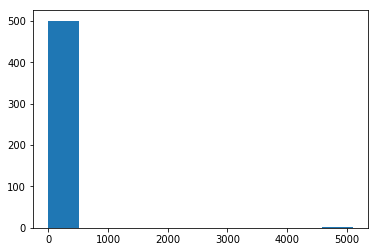

In [37]:
what_hist_returns = plt.hist(x)
print(what_hist_returns)

[254.9, 764.7, 1274.5, 1784.3000000000002, 2294.1, 2803.9, 3313.7, 3823.5, 4333.3, 4843.1]
[501.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
[509.8, 509.8, 509.80000000000007, 509.79999999999995, 509.79999999999995, 509.8000000000002, 509.7999999999997, 509.8000000000002, 509.7999999999997, 509.8000000000002]


<BarContainer object of 10 artists>

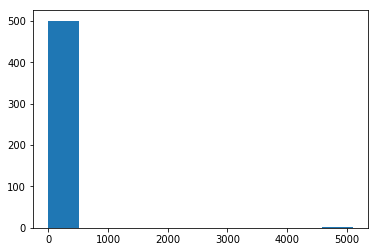

In [48]:
whr = what_hist_returns

x_coord = [(whr[1][i]+whr[1][i+1])/2 for i in range(len(whr[1])-1)]
height = what_hist_returns[0]
width = [whr[1][i+1]-whr[1][i] for i in range(len(whr[1])-1)]

plt.bar(x_coord, height, width)

(array([83., 97., 97., 84., 39., 15.,  8.,  1.,  0.,  1.]), array([0.        , 0.85366036, 1.70732072, 2.56098108, 3.41464143,
       4.26830179, 5.12196215, 5.97562251, 6.82928287, 7.68294323,
       8.53660358]), <a list of 10 Patch objects>)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


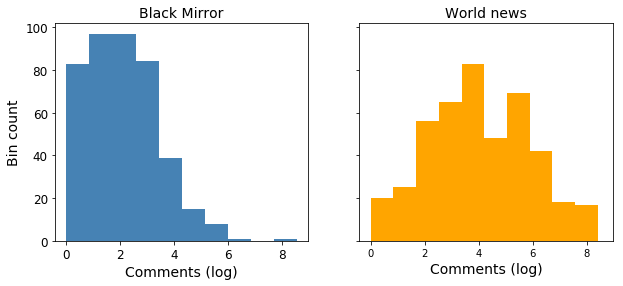

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

ax[0].set_title("Black Mirror", fontsize=14)
ax[1].set_title("World news", fontsize=14)
h=ax[0].hist([v for v in np.log(x_tv) if not np.isinf(v)], color="steelblue")
ax[1].hist([v for v in np.log(x_ne) if not np.isinf(v)], color="orange")

print(h)

#ax[0].set_xlim(1, 1e)
#ax[0].set_ylim(1, 1e5)
ax[0].set_xlabel("Comments (log)", fontsize=14)
ax[1].set_xlabel("Comments (log)", fontsize=14)
ax[0].set_ylabel("Bin count", fontsize=14)
ax[0].tick_params(labelsize=12)

### Part 2: Linear algebra (DSFS Chapter 4)

>**Ex. 2.2.1**: What does Joel (book) mean when he uses the word *vector*? What does [Grant](https://youtu.be/fNk_zzaMoSs) mean?

In [ ]:
#points in space vs ?

>**Ex. 2.2.2**: Using `numpy`, compute:
1. `2 * [2, 3]`,
2. `[3, 8] + [6, 1]`,
3. `[3, 8] * [6, 1]` and
4. `[3, 8] · [6, 1]` (dot product)
5. `[3, 8, 0] x [6, 1, 0]` (cross product)

In [55]:
#1
a = np.array([2,3])
print(a)
b = 2*a
print(b)

[2 3]
[4 6]


In [56]:
#2
a = np.array([3,8])
b = np.array([6,1])
print(a+b)

[9 9]


In [57]:
#3
print(a*b)

[18  8]


In [58]:
#4
np.dot(a,b)

26

In [65]:
#5
a = np.array([3,8,0])
b = np.array([6,1,0])

c = np.cross(a,b)

print(c)

[  0   0 -45]


>**Ex. 2.2.3**: Imagine you have two vectors. What does it mean that the dot product between them is zero or very close to zero? What if it's very large? Intuitively, what does the dot product then measure?

close to zero means that they are almost perpendicular.
large number means that they are almost parallel.
so, it measures similarity (one is a scalar product of the other or not)

>**Ex. 2.2.4**: In Data Science, we often think of matrices as (usually two-dimensional) containers for data. Let's say we collect $N=500$ data points, that each has $M=10$ features. We can loslessly represent that data using an $N \times M$ matrix, that is a matrix that has a row for each datapoint and a column for each feature. In fact, let's just go ahead and do that by altering the code of the `get_x_y` function from before a little bit.
>
>*Note: `numpy` has an object type called `matrix` but we rarely use that. Instead, we represent matrices as a `numpy` object type called `array`.*

In [67]:
def get_data_matrix(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    X = []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            X.append([
                int(d['data']['num_comments']),
                int(d['data']['score']),
                int(d['data']['ups']),
                int(d['data']['downs']),
                len(d['data']['selftext']),
                len(d['data']['title']),
                int(d['data']['is_original_content']),
                int(d['data']['spoiler']),
                int(d['data']['num_crossposts']),
                int(d['data']['is_video'])
            ])
        after = data['data']['after']

    return np.array(X)
                          
X = get_data_matrix("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_cwc5j8
Retrieved 25 posts from page t3_cwtemz
Retrieved 25 posts from page t3_cwhnjo
Retrieved 25 posts from page t3_cvv033
Retrieved 25 posts from page t3_cvyr91
Retrieved 25 posts from page t3_cvvdcy
Retrieved 25 posts from page t3_cvw9bk
Retrieved 25 posts from page t3_cvs9bb
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_cwc5j8
Retrieved 25 posts from page t3_cwtemz
Retrieved 25 posts from page t3_cwhnjo
Retrieved 25 posts from page t3_cvv033
Retrieved 25 posts from page t3_cvyr91
Retrieved 25 posts from page t3_cvvdcy
Retrieved 25 posts from page t3_cvw9bk
Retrieved 25 posts from page t3_cvs9bb
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_cwc5j8


In [72]:
X

array([[ 2095, 31905, 31905, ...,     0,     8,     0],
       [  927,  9569,  9569, ...,     0,     2,     0],
       [ 2239, 42282, 42282, ...,     0,     5,     0],
       ...,
       [    1,     6,     6, ...,     0,     0,     0],
       [  146,   256,   256, ...,     0,     1,     0],
       [    1,    19,    19, ...,     0,     0,     0]])

>Here are the data, but how can we summarize them? Let's start by finding the so-called *covariance matrix*.
1. Use the `np.cov` method on `X` to get its $10 \times 10$ covariance matrix.
2. Do you notice any characteristics of this matrix that are interesting? Comment.
3. Plot the distribution of covariances, e.g. using a histogram.

In [77]:
cov_mat = np.cov(X.transpose())
cov_mat

array([[2.98147376e+05, 5.38344167e+06, 5.38344167e+06, 0.00000000e+00,
        0.00000000e+00, 2.56335320e+03, 0.00000000e+00, 0.00000000e+00,
        8.01764500e+02, 0.00000000e+00],
       [5.38344167e+06, 1.20834363e+08, 1.20834363e+08, 0.00000000e+00,
        0.00000000e+00, 3.34158131e+04, 0.00000000e+00, 0.00000000e+00,
        1.82516732e+04, 0.00000000e+00],
       [5.38344167e+06, 1.20834363e+08, 1.20834363e+08, 0.00000000e+00,
        0.00000000e+00, 3.34158131e+04, 0.00000000e+00, 0.00000000e+00,
        1.82516732e+04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.56335320e+03, 3.34158131e+04, 3.34158131e+04, 0.00000000e+00,
   

([array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([8., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
  array([8., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([0.00000000e+00, 1.20834363e+07, 2.41668726e+07, 3.62503088e+07,
        4.83337451e+07, 6.04171814e+07, 7.25006177e+07, 8.45840540e+07,
        9.66674902e+07, 1.08750927e+08, 1.20834363e+08]),
 <a list of 10 Lists of Patches objects>)

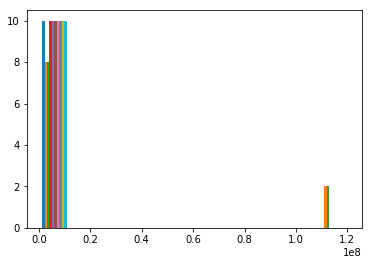

In [85]:
#3
#cov_mat.reshape(-1)
plt.hist(cov_mat)
#plt.hist(cov_mat.reshape(-1))

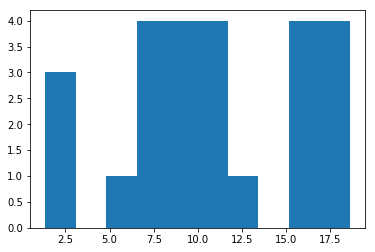

In [93]:

plt.hist(np.log([v for v in cov_mat.reshape(-1)  if v>0]))
plt.show()

>**Ex. 2.2.5**: There's another use of the covariance matrix, other than just learning how features co-vary. In fact, it turns out that the *eigenvectors* of the covariance matrix are a set of mutually orthogonal vectors, that point in the directions of greatest variance in the data. The eigenvector with the greatest *eigenvalue* points along the direction of greatest variation, and so on. This is pretty neat, because if we know along which axes the data is most stretched, we can figure out how best to project it when visualizing it in 2D as a scatter plot! This whole procedure has a name: **Principal Component Analysis** (PCA) and it was invented by Karl Pearson in 1901. It belongs to a powerful class of linear algebra methods called **Matrix Factorization** methods. Ok, so rather than spending too much time on the math of PCA, let's just use the `sklearn` implementation and fit a PCA on `X`.

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)
#pca.components_

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

>1. Explain what the matrix you get when you call `pca.components_` means.
2. Explain what the vector you get when you call `pca.explained_variance_ratio_` means. What insights about our data can we extract from this?
3. Transform X using the PCA you just fitted, and scatter plot the first two dimensions of the transformed data. Please comment on what you see.
3. Scatter plot dimensions 1 and 3 against each other. See something interesting now? What would be a way to figure out what the clusters represent?

#1
pca.components_

components_ : array, shape (n_components, n_features)
Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_

In [100]:
#2
pca.explained_variance_ratio_
#the percentage of variance due to each component

array([9.99757077e-01, 2.40797447e-04, 2.12096402e-06, 4.76386585e-09,
       1.18388347e-34, 4.05468511e-44, 1.77880855e-69, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

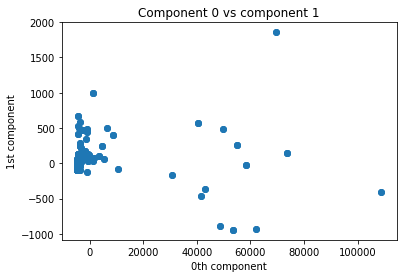

In [105]:
X_pca = pca.transform(X)


plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("Component 0 vs component 1")
plt.xlabel("0th component")
plt.ylabel("1st component")
plt.show()

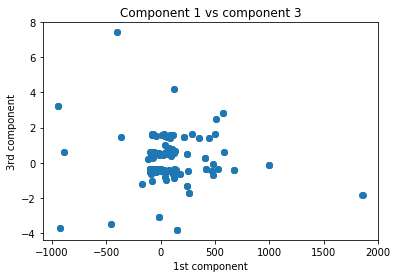

In [106]:
plt.scatter(X_pca[:,1], X_pca[:,3])
plt.title("Component 1 vs component 3")
plt.xlabel("1st component")
plt.ylabel("3rd component")
plt.show()

### Part 3: Statistics (DSFS Chapter 5)

>**Ex. 2.3.1**: Take a vector `a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]`:
1. Compute the mean of `a` using `numpy`.
2. How is median defined? Compute the median of `a` using `numpy`.
3. For `a`, why might it make sense to take the median more seriously than the mean?

In [107]:
a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]
np.mean(a)

1002.3333333333334

In [110]:
np.median(a)

3.0

In [114]:
#3 because there's an outlier that significantly impacts the mean, median is not affected

>**Ex. 2.3.2**: Using the same vector `a`:
1. How is *range* defined? Compute it.
2. How is *variance* defined? How do variance and standard deviation relate? Compute them both. Which value is greater?
3. What is the interquartile range? Compute it, and explain why it might be useful.

In [142]:
newrange = max(a)-min(a)
print(newrange)

8999


In [118]:
variance = np.var(a)
print(variance)

7995336.222222224


In [119]:
std = np.std(a)
print(std)

2827.6025573305424


In [121]:
IQR = np.percentile(a, 75) - np.percentile(a, 25)
print(IQR)

4.0


>**Ex. 2.3.3**: Covariance and correlation are both measures of trend similarity.
1. How do they relate?
2. Compute the correlation between `a` and `b = [0, 4, 1, 6, 2, 0, 6, 0, 2]`.
3. How does that result change if you remove the last data-point from each list? Why? What *term* do we use for that last point?

In [123]:
#correlation: a change in one is accompanied by a change in the other
#covariance: how they vary together
b = [0, 4, 1, 6, 2, 0, 6, 0, 2]
cov = np.cov(a,b)
print(cov)

[[ 8.99475325e+06 -3.74500000e+02]
 [-3.74500000e+02  6.00000000e+00]]


>**Ex. 2.3.4**: People often use the p-value to gauge the *significance* of a given result. If the p-value of a result is low, the result is significant (which is good) and vice versa. Intuitively, the p-value measures the probabilty that a result *could have been obtained at random*, so you can imagine that if you find that the p-value for some result is HIGH (close to one), regardless of how cool it is, people will not care because, well, you just got lucky with that measurement, didn't you? I created two lists for you below, and you are going to find out if they are *significantly* correlated. You will be using the significance threshold 0.05 (which is arbitrary, disputed, yet very standard in the literature).

In [20]:
# You can incresae this to make the data more noisy (but let it be 4 for now)
noise_level = 4

# I'm just seeding the random number generator here, so we can compare results
np.random.seed(0)

# This is your data
x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
y = np.arange(0, 20) + np.random.normal(size=20) * noise_level

print(x)
print(y)

[ 7.05620938  2.60062883  5.91495194 11.9635728  11.47023196  1.09088848
  9.80035367  6.39457117  7.58712459 10.64239401 10.57617428 16.81709403
 15.0441509  13.48670007 15.77545293 16.33469731 21.97631629 16.17936694
 19.25227081 15.58361704]
[-10.21195926   3.61447438   5.4577448    0.03133992  13.0790185
  -0.8174627    6.18303407   6.2512646   14.13111686  14.87743508
  10.6197897   12.51265008   8.44885701   5.07681413  12.6083514
  15.62539588  20.92116272  21.8095194   16.45069273  17.790789  ]


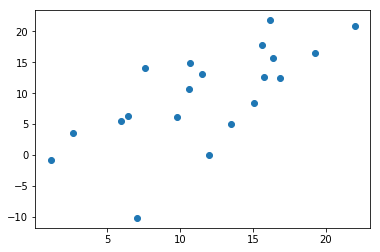

In [126]:
# Why not make a scatter plot here, to see what you're working with?
plt.scatter(x, y)

>1. If you plotted `x` and `y` against each other, you probably noted that it looks like they correlate. Use the method `pearsonr` from `scipy.stats` to **compute the correlation coefficient**. Notice that the method also gives you the p-value of the correlation. For now, we ignore this.
>2. So how do we figure out if this correlation strength is significant? 
The devil's advocate would surely argue, that you could obtain a similar *or stronger* correlation between completely random data.
Well, fuck you advocate, cause we can SHOW that if you randomize the data, the correlation strength is almost always lower!
To put this in stat-lingo, the devil's advocate believes in the so-called *Null Hypothesis*–that your result is no different from random–and the way WE reject this acvocate's pessimistic hypothesis, is simply by comparing OUR obtained correlation strength to one obtained from data we know is random, namely the *Null model*.
The Null model, in this case just a randomized version of our existing data. 
Your job, now, is to take `x` and `y`, randomize them (each independently) and compute the correlation coefficient.
>3. In 2. you probably found that the correlation coefficient of the Null model was lower than that of your real data.
But that was just one example of the Null hypothesis being wrong.
The devil's advocate needs more evidence.
Compute again the correlation coefficient of the Null model, but do it in a `for` loop 10000 times, and report the fraction of times that this correlation coefficient is greater or equal to the correlation coefficient of your real data.
Maybe it will happen in 0% of randomizaion trials, maybe 2%, but hopefully not more than 5%.
Yes, you guessed, it, this fraction is indeed the p-value.
So is it really significant?
>4. Plot the p-value as a function of `noise_level` (let `noise_level` vary between 1 and 50), so we can see how our result becomes less and less significant as we increase the noise. Two questions: (1) at which value of `noise_level` does the correlation become insignificant, and (2) which p-value does the curve saturate at for large `noise_level`?

In [128]:
from scipy.stats import pearsonr

r_real = pearsonr(x, y)[0]
print(r_real)

0.6903628160082481


In [130]:
trials = []
for _ in range(10000):
    x_shuf = np.random.choice(x, size=len(x), replace=False)
    y_shuf = np.random.choice(y, size=len(x), replace=False)
    r_shuf = pearsonr(x_shuf, y_shuf)[0]
    trials.append(r_shuf > r_real)
np.mean(trials)

TypeError: 'int' object is not callable